### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import  StandardScaler

sns.set(style="whitegrid")

## 1. Load data

In [2]:
data = pd.read_csv("../../datasets/1.04.+Real-life+example.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 2. Data Preprocessing

#### 2.1 Exploring the descriptive stats of the variables

In [3]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = data.drop(columns=["Registration"], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4


In [5]:
data = data.drop(['Model'],axis=1)

## Dealing with missing values

In [6]:
# we have some missing values in the dataset
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis=0)

data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### exploring probability distribution functions data

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\3616421594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["Price"])


Text(0.5, 1.0, 'Price Distribution')

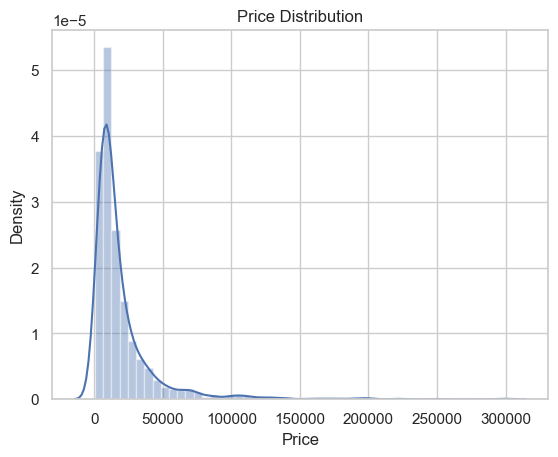

In [8]:
sns.distplot(data_no_mv["Price"])
plt.title("Price Distribution")

<Axes: ylabel='Price'>

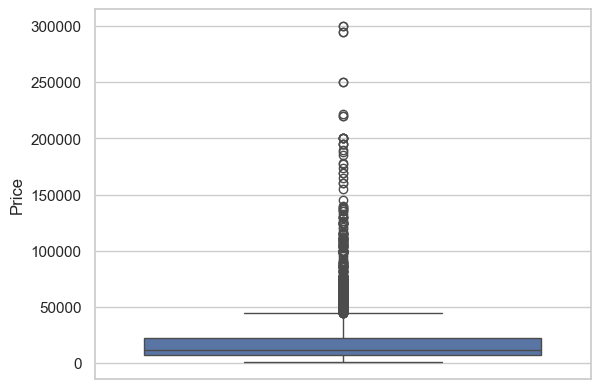

In [9]:
sns.boxplot(data_no_mv["Price"])

## Methods for dealing with outliers:

1. #### *Z-Score Treatment*

#### **Trimming and Capping techniques**

In [10]:
upper_limit = data_no_mv['Price'].mean() + 3* data_no_mv['Price'].std()
lower_limit = data_no_mv['Price'].mean() - 3* data_no_mv['Price'].std()

print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  96999.51302921986
Lower Limit:  -57894.89690002731


In [11]:
# find the outliers

data_no_mv.loc[(data_no_mv['Price'] > upper_limit) | (data_no_mv['Price']<lower_limit)] 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,2016
62,BMW,133000.0,crossover,7,4.40,Petrol,2015
104,Mercedes-Benz,107999.0,crossover,0,2.98,Diesel,2016
131,Toyota,195000.0,crossover,0,4.50,Diesel,2016
173,Mercedes-Benz,169000.0,other,1,4.70,Petrol,2015
...,...,...,...,...,...,...,...
4274,Mercedes-Benz,109999.0,crossover,0,2.98,Diesel,2016
4277,Mercedes-Benz,111999.0,crossover,0,3.00,Diesel,2016
4318,Mercedes-Benz,300000.0,other,37,5.00,Petrol,2012
4322,Toyota,100000.0,crossover,0,4.50,Diesel,2016


#### <u>Trimming</u>

In [12]:
# trimming the outliers (delete the outliers data)

new_df = data_no_mv.loc[(data_no_mv["Price"] < upper_limit) & (data_no_mv['Price'] > lower_limit)]

In [13]:
print("Before: ",len(data_no_mv))
print("After: ", len(new_df))
print("Outliers: ",len(data_no_mv) - len(new_df))

Before:  4025
After:  3926
Outliers:  99


Text(0.5, 1.0, 'Price Distribution after removing outliers')

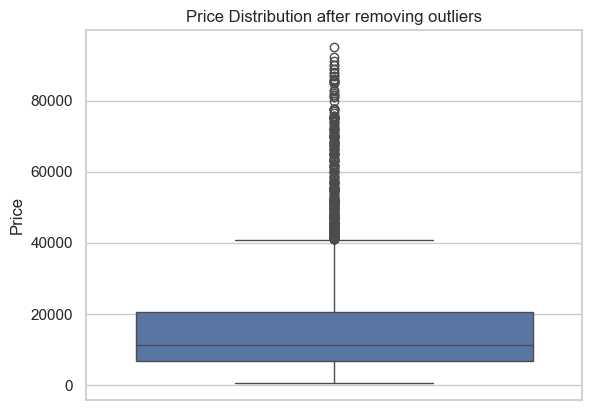

In [14]:
sns.boxplot(new_df["Price"])
plt.title("Price Distribution after removing outliers")

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\794476926.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["Price"])


Text(0.5, 1.0, 'Price Distribution after removing outliers')

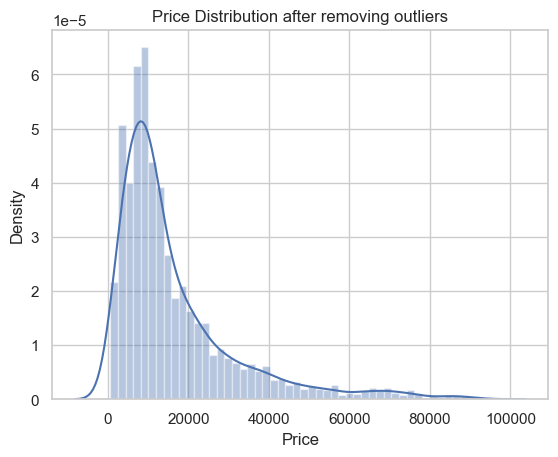

In [15]:
sns.distplot(new_df["Price"])
plt.title("Price Distribution after removing outliers")

#### <u>Capping</u>

In [16]:
# capping the outliers (replace the outliers with the upper and lower limit values)
new_df = data_no_mv.copy()

In [17]:
new_df.loc[new_df['Price'] > upper_limit, 'Price'] = upper_limit
new_df.loc[new_df['Price'] < lower_limit, 'Price'] = lower_limit

Text(0.5, 1.0, 'Price Distribution after removing outliers')

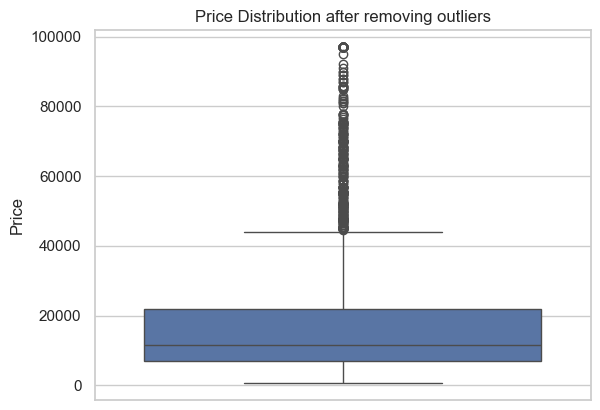

In [18]:
sns.boxplot(new_df["Price"])
plt.title("Price Distribution after removing outliers")

#### 2.  *Inter Quartile Range IQR method*

In [19]:
q1 = data_no_mv['Price'].quantile(0.25)
q3 = data_no_mv['Price'].quantile(0.75)

iqr = q3 - q1

print("q1 = {q1}, q3 ={q3}, iqr = {iqr}".format(q1=q1, q3=q3, iqr=iqr))

q1 = 6999.0, q3 =21900.0, iqr = 14901.0


In [20]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print("Lower Limit: {lower_limit}, Upper Limit: {upper_limit}".format(lower_limit=lower_limit, upper_limit=upper_limit))

Lower Limit: -15352.5, Upper Limit: 44251.5


#### Trimming

In [21]:
# find the outliers
data_no_mv.loc[(data_no_mv['Price'] > upper_limit) | (data_no_mv['Price']<lower_limit)] 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016
37,BMW,67500.0,crossover,1,2.5,Diesel,2016
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,2009
62,BMW,133000.0,crossover,7,4.4,Petrol,2015
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,2006
...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,2012
4322,Toyota,100000.0,crossover,0,4.5,Diesel,2016
4327,Audi,80999.0,crossover,0,3.0,Diesel,2016
4331,BMW,45000.0,crossover,80,3.0,Petrol,2011


In [22]:
# trim the data

new_df = data_no_mv.loc[(data_no_mv["Price"] < upper_limit) & (data_no_mv['Price'] > lower_limit)]
print("Before: ",len(data_no_mv))
print("After: ", len(new_df))
print("Outliers: ",len(data_no_mv) - len(new_df))

Before:  4025
After:  3670
Outliers:  355


#### Capping

In [23]:
# capping the outliers (replace the outliers with the upper and lower limit values)
new_df = data_no_mv.copy()

new_df.loc[new_df['Price'] > upper_limit, 'Price'] = upper_limit
new_df.loc[new_df['Price'] < lower_limit, 'Price'] = lower_limit

Text(0.5, 1.0, 'Price Distribution after removing outliers')

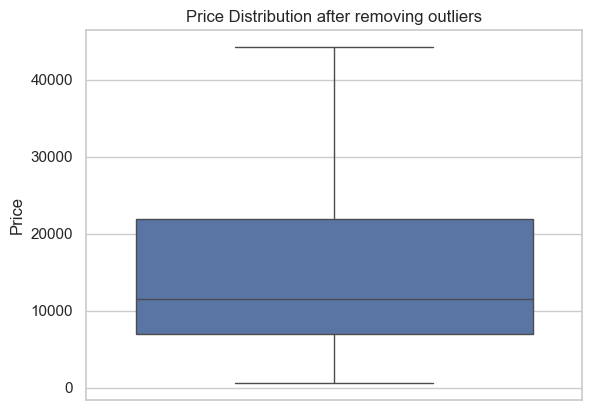

In [24]:
sns.boxplot(new_df["Price"])
plt.title("Price Distribution after removing outliers")

## 3. Percentile Method

In [25]:
upper_limit = data_no_mv['Price'].quantile(0.99)
lower_limit = data_no_mv['Price'].quantile(0.01)

print("lower limit: {lower_limit}, upper limit: {upper_limit} ".format(lower_limit=lower_limit, upper_limit=upper_limit))

lower limit: 1600.0, upper limit: 129812.51999999981 


Text(0.5, 1.0, 'Price Distribution before removing outliers')

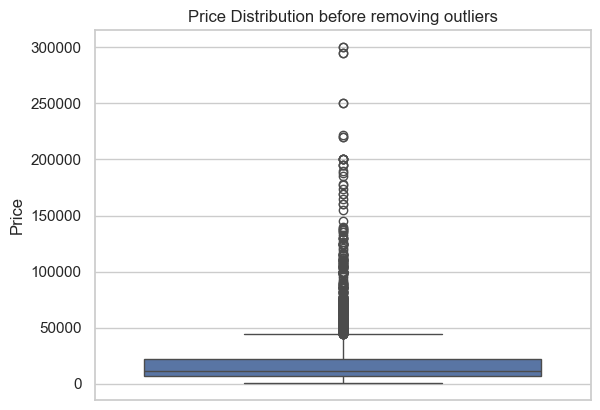

In [26]:
sns.boxplot(data_no_mv["Price"])
plt.title("Price Distribution before removing outliers")

In [27]:
# find the outliers
data_no_mv.loc[(data_no_mv['Price'] > upper_limit) | (data_no_mv['Price']<lower_limit)] 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
5,Mercedes-Benz,199999.00,crossover,0,5.5,Petrol,2016
9,Volkswagen,1400.00,other,212,1.8,Gas,1999
62,BMW,133000.00,crossover,7,4.4,Petrol,2015
120,Volkswagen,1500.00,other,260,1.8,Gas,1994
131,Toyota,195000.00,crossover,0,4.5,Diesel,2016
...,...,...,...,...,...,...,...
3947,Toyota,1100.00,van,140,2.0,Gas,1985
4044,Mercedes-Benz,219900.00,crossover,30,6.3,Petrol,2013
4101,Mercedes-Benz,295000.00,sedan,29,6.0,Petrol,2011
4234,Volkswagen,1296.75,sedan,1,1.6,Petrol,1980


In [28]:
# Trim the data

new_df = data_no_mv.loc[(data_no_mv['Price']<= upper_limit) & (data_no_mv['Price']>= lower_limit)]
print("Before: ",len(data_no_mv))
print("After: ", len(new_df))
print("Outliers: ",len(data_no_mv) - len(new_df))

Before:  4025
After:  3944
Outliers:  81


<Axes: ylabel='Price'>

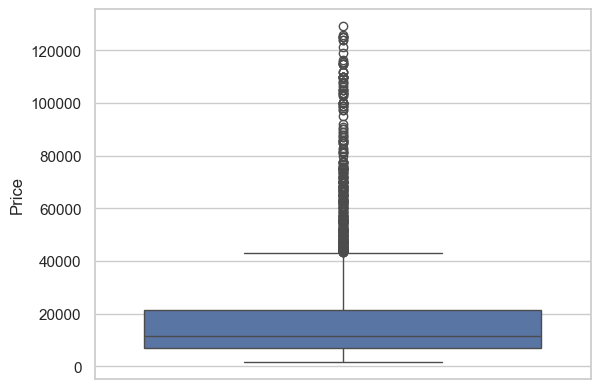

In [29]:
sns.boxplot(new_df["Price"])

In [30]:
# capping the outliers (replace the outliers with the upper and lower limit values)
new_df = data_no_mv.copy()

new_df.loc[new_df['Price'] > upper_limit, 'Price'] = upper_limit
new_df.loc[new_df['Price'] < lower_limit, 'Price'] = lower_limit

Text(0.5, 1.0, 'Price Distribution after capping outliers')

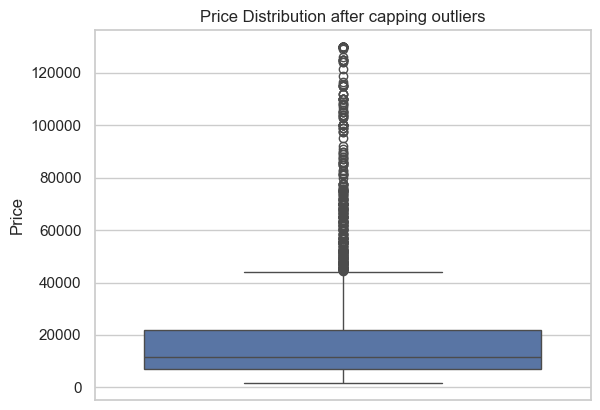

In [31]:
sns.boxplot(new_df["Price"])
plt.title("Price Distribution after capping outliers")

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\3692757591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["Price"])


Text(0.5, 1.0, 'Price Distribution after capping outliers')

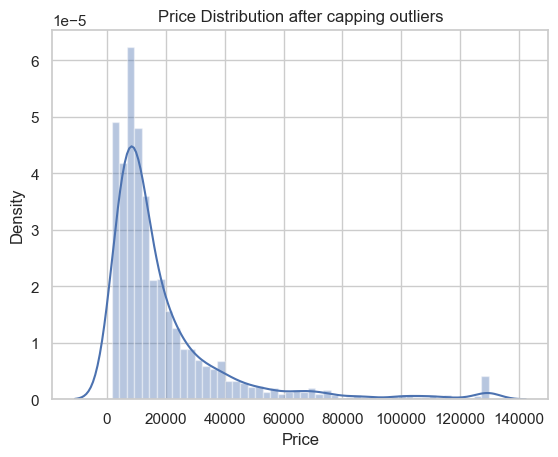

In [32]:
sns.distplot(new_df["Price"])
plt.title("Price Distribution after capping outliers")

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\2436711082.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["Price"])


Text(0.5, 1.0, 'Price Distribution before capping outliers')

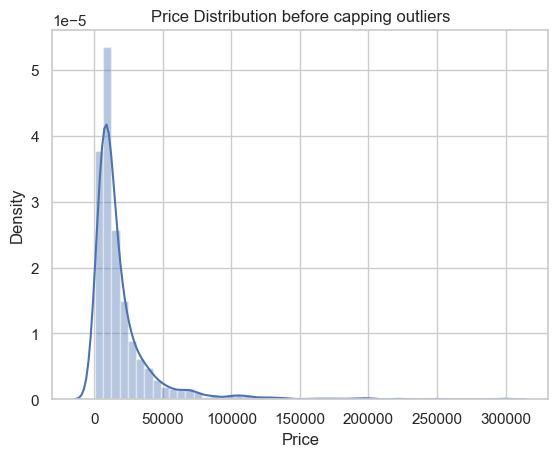

In [33]:
sns.distplot(data_no_mv["Price"])
plt.title("Price Distribution before capping outliers")

In [34]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1528,NaN,NaN,1853,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000


C:\Users\manga\AppData\Local\Temp\ipykernel_1368\1728726550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

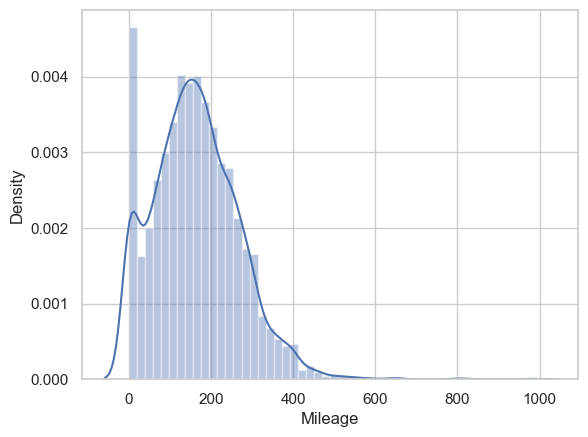

In [35]:
# plot the distribution of the mileage

sns.distplot(data_no_mv['Mileage'])

In [36]:
# find the outliers
upper_limit = data_1['Mileage'].quantile(0.99)
data_1.loc[(data_1['Mileage'] > upper_limit)] 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
6,BMW,6100.0,sedan,438,2.0,Gas,1997
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,1991
284,Renault,4900.0,van,472,2.5,Diesel,2000
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,1985
899,Volkswagen,6500.0,other,547,1.9,Diesel,1998
922,Volkswagen,5200.0,van,442,2.4,Diesel,1992
1198,Volkswagen,8700.0,other,520,2.5,Diesel,1999
1393,Toyota,2700.0,sedan,550,1.6,Gas,1989
1410,Volkswagen,4900.0,sedan,500,1.9,Diesel,1995
1813,Mercedes-Benz,8500.0,van,630,2.9,Diesel,1998


In [37]:
# trim the outliers (delete the outliers data)

data_2 = data_1.loc[(data_1['Mileage']<= upper_limit)]
print("Before: ",len(data_no_mv))
print("After: ", len(data_2))
print("Outliers: ",len(data_no_mv) - len(data_2))


Before:  4025
After:  3944
Outliers:  81


C:\Users\manga\AppData\Local\Temp\ipykernel_1368\759271554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Mileage"])


Text(0.5, 1.0, 'Mileage Distribution after removing outliers')

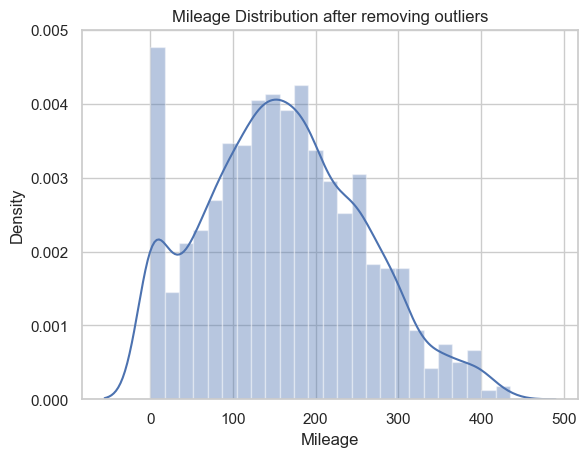

In [38]:
sns.distplot(data_2["Mileage"])
plt.title("Mileage Distribution after removing outliers")

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\1549690588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

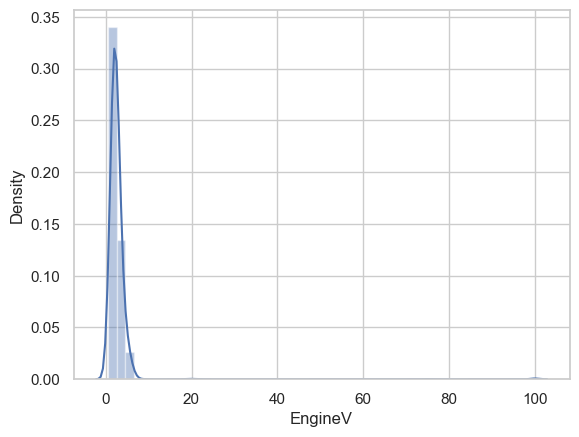

In [39]:
# PDF ENGINE VOLUME
sns.distplot(data_no_mv['EngineV'])

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\3842179455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

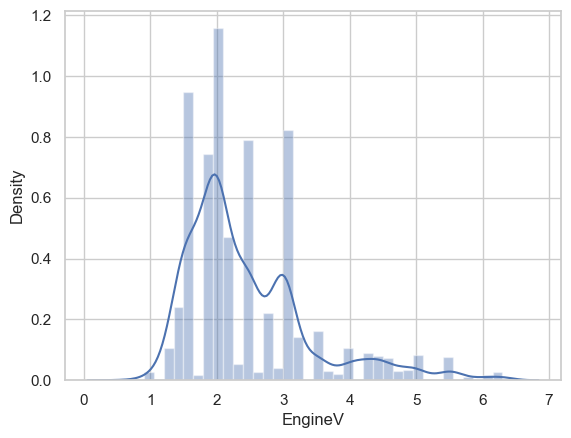

In [40]:
data_3 = data_2[data_2['EngineV']<6.5]

sns.distplot(data_3['EngineV'])

C:\Users\manga\AppData\Local\Temp\ipykernel_1368\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

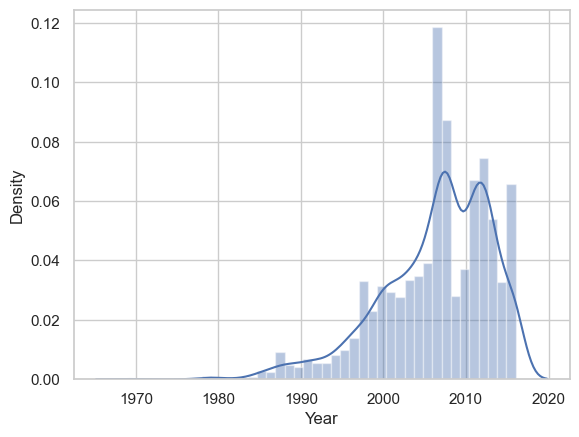

In [41]:
sns.distplot(data_no_mv['Year'])

In [42]:
# find the outliers
lower_limit = data_3['Year'].quantile(0.01)


In [43]:
# trim the outliers (delete the outliers data)

data_4 = data_3.loc[(data_3['Year']>= lower_limit)]
print("Before: ",len(data_3))
print("After: ", len(data_4))
print("Outliers: ",len(data_3) - len(data_4))

Before:  3921
After:  3885
Outliers:  36


C:\Users\manga\AppData\Local\Temp\ipykernel_1368\3005889727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4["Year"])


<Axes: xlabel='Year', ylabel='Density'>

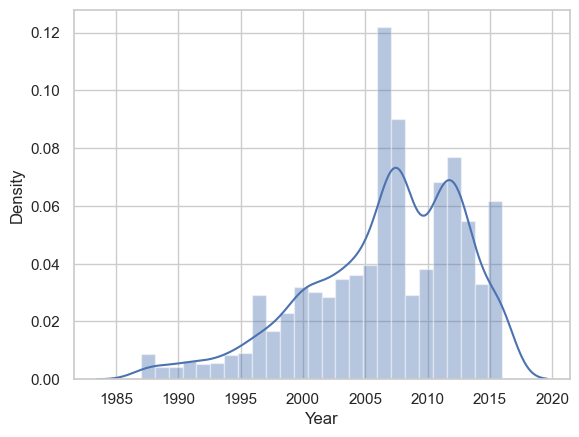

In [44]:
sns.distplot(data_4["Year"])

In [45]:
data_cleaned = data_4.reset_index(drop=True)

In [46]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
3880,Volkswagen,11500.0,van,163,2.5,Diesel,2008
3881,Toyota,17900.0,sedan,35,1.6,Petrol,2014
3882,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
3883,BMW,6500.0,sedan,1,3.5,Petrol,1999


In [47]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3885,3885.000000,3885,3885.000000,3885.000000,3885,3885.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,853,NaN,1476,NaN,NaN,1808,NaN
mean,NaN,18121.417429,NaN,161.022394,2.447606,NaN,2006.618533
std,NaN,19071.730150,NaN,95.803259,0.948303,NaN,6.235109
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1987.000000
25%,NaN,7170.000000,NaN,92.000000,1.800000,NaN,2003.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,2008.000000
75%,NaN,21500.000000,NaN,227.000000,3.000000,NaN,2012.000000


## Checking for OLS assumptions

In [48]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3885.000000,3885.000000,3885.000000,3885.000000
mean,18121.417429,161.022394,2.447606,2006.618533
std,19071.730150,95.803259,0.948303,6.235109
min,800.000000,0.000000,0.600000,1987.000000
25%,7170.000000,92.000000,1.800000,2003.000000
50%,11600.000000,158.000000,2.200000,2008.000000
75%,21500.000000,227.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'EngineV vs Price')

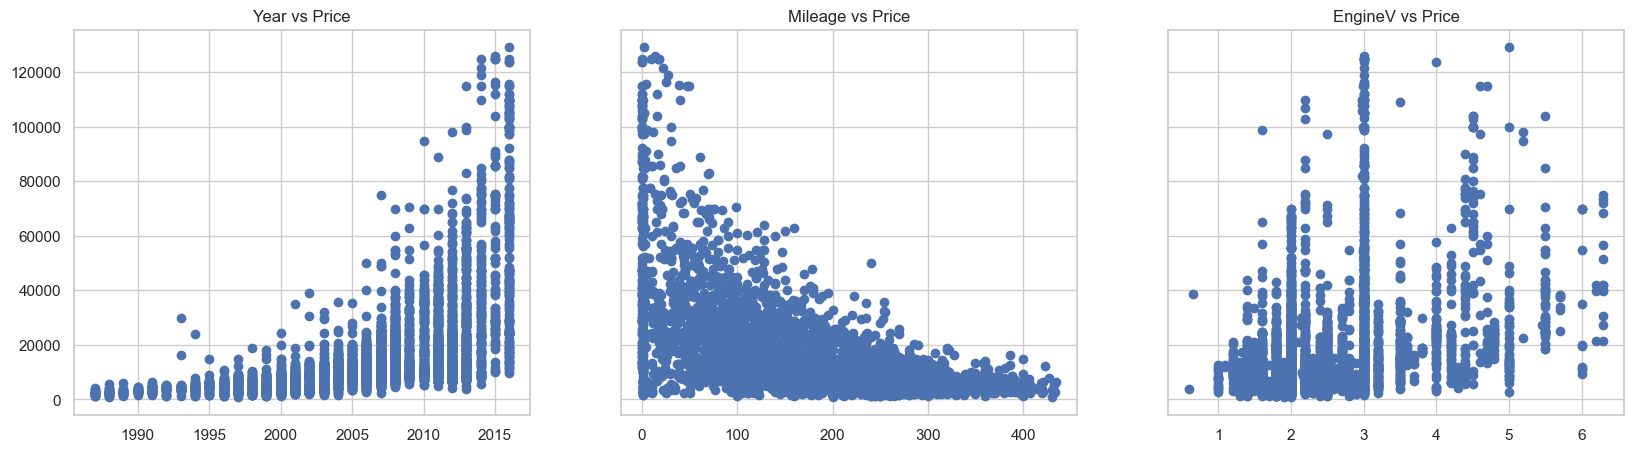

In [49]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(20, 5))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Year vs Price")
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title("Mileage vs Price")
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title("EngineV vs Price")

##### Relaxing the assumption

In [50]:
log_price = np.log(data_cleaned['Price'])

data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


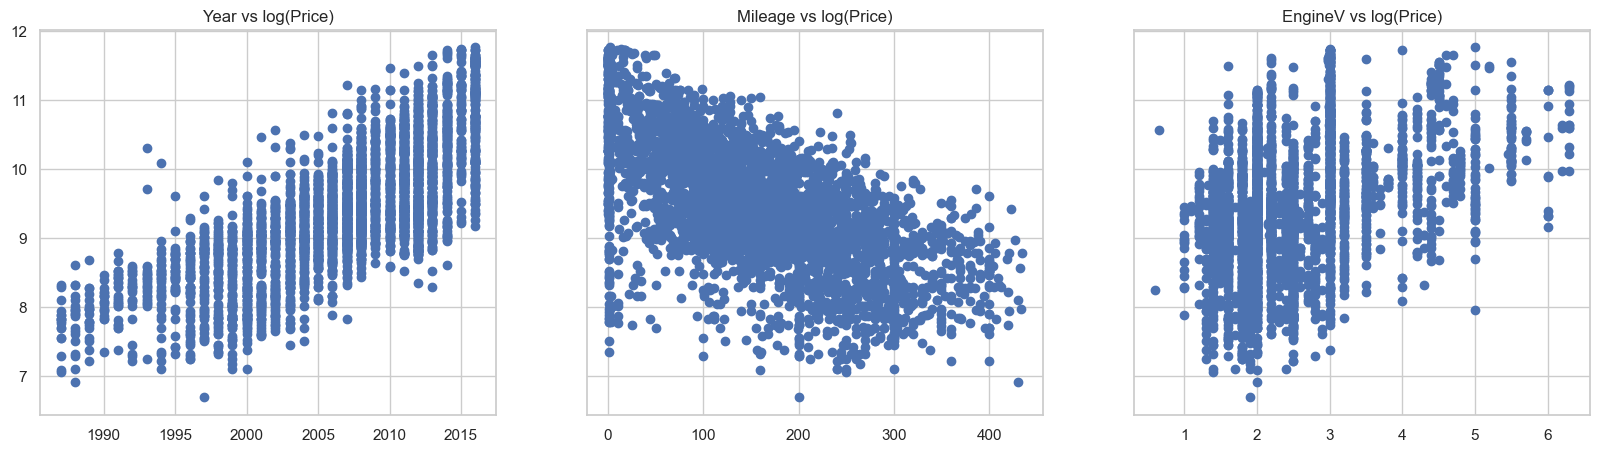

In [51]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (20,5))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title("Year vs log(Price)")

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title("Mileage vs log(Price)")

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title("EngineV vs log(Price)")

plt.show()  

In [52]:
data_cleaned = data_cleaned.drop(columns=["Price"], axis=1)

### Multicollinearity

In [53]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'log_price'], dtype=object)

In [54]:
# one of the best ways to check for multicollinearity is through VIF (Varience Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [55]:
vif

,VIF,Features
0,10.390939,Year
1,3.797617,Mileage
2,7.662210,EngineV


In [56]:
data_no_multicollinearity = data_cleaned.drop(columns=['Year'], axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


In [57]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656
...,...,...,...,...,...,...
3880,Volkswagen,van,163,2.5,Diesel,9.350102
3881,Toyota,sedan,35,1.6,Petrol,9.792556
3882,Mercedes-Benz,sedan,9,3.0,Diesel,11.736069
3883,BMW,sedan,1,3.5,Petrol,8.779557


## Create dummy variables

In [58]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)      
data_with_dummies.head()


,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [59]:
data_with_dummies = data_with_dummies.astype(int)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1


##### Rearrange

In [60]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [61]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [62]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Linear Regression model

##### Declare Inputs  and targets

In [63]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(columns=['log_price'], axis=1)

##### Scale the data

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [65]:
scaled_inputs = scaler.transform(inputs)

##### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=365)

##### Create the regression model


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
y_hat = reg.predict(x_train)

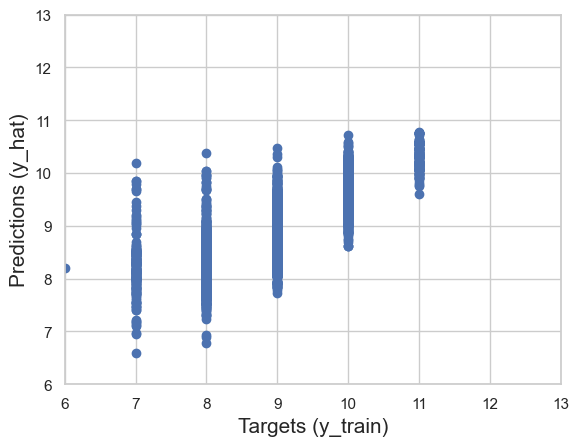

In [71]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=15)
plt.ylabel("Predictions (y_hat)", size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()